In [1]:
## creating a simple Linear regression model over the diabetes dataset
## by default Linear regression model is also called OLS model
## OLS --> Ordinary least Squares Model

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## loading the Toy diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

## https://scikit-learn.org/stable/datasets/index.html#toy-datasets

## data pre-processing. to convert ndarray to df
df = pd.DataFrame(diabetes.data)

df.columns = diabetes.feature_names

# Creating a new column containing response variable 'y' 
## (a quantitative measure of disease progression one year after baseline)
df['diabetes_measure'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Creating the feature matrix X
X = df.iloc[ : , : -1]
# Creating the response vector y
y = df.iloc[ : ,-1]


##--------------------------------
## creating a single Var OLS model 
##--------------------------------

# Choosing 'bmi' as the only feature from the feature matrix X 
## and reshaping the array to 2 dimensions
bmi = X.iloc[ : , 2]  ## [10, 20,]
bmi = bmi[ : , np.newaxis] 
## [ [10]
##   [20]  ]

# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y = df.iloc[ : ,-1]
y = y[ : ,np.newaxis]

## why use np.newaxis ?
## https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it


from sklearn.linear_model import LinearRegression

# Fitting the simple_lr object to the data --> this is a single Var LR model
simple_lr = LinearRegression().fit(bmi,y)

# predicting the response values and saving them in an object called predicted_y
predicted_y = simple_lr.predict(bmi)

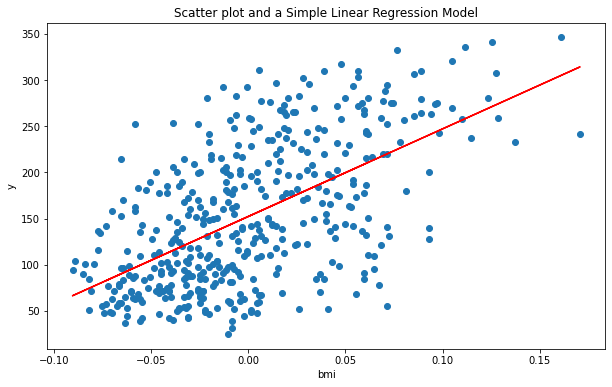

In [3]:
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)

plt.plot(bmi, predicted_y, c='r')

plt.title('Scatter plot and a Simple Linear Regression Model')

plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

In [4]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

## parameters to cross_val_score method  : 
## estimator(model) object, a feature matrix, a response vector, 
## a scoring mechanism ('neg_mean_squared_error' in our case) and cv 

# storing the ten scores in an object called mse
mse = cross_val_score(simple_lr, bmi, y, scoring='neg_mean_squared_error', cv=10)

print(mse)

# taking the mean of mse for using as an indicator of how good the model is
print(mse.mean())

## for mse  --> ideal value would be 0.

[-3887.88568862 -3723.13170703 -4213.18191102 -3909.35846549
 -3896.1811731  -3774.68344227 -4571.55641957 -2833.03811406
 -5037.63956214 -3222.53341777]
-3906.91899010684


So, we have an average score of **-3906.92 for 'neg_mean_squared_error'** for our simple linear regression model 'simple_lr'.

Let us check if adding more features improves model, producing an overall better average score. Next we check **`multiple linear regression`**.

In [5]:
# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = LinearRegression().fit(X,y)

# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

# storing the ten scores in an object called mse
mse = cross_val_score(multiple_lr, X, y, scoring='neg_mean_squared_error', cv=10)

print(mse)

# taking the mean of mse for using as an indicator of how good the model is
print(mse.mean())

[-2533.84810936 -2870.76771141 -3512.7235093  -2759.22712936
 -3555.67794309 -2900.38041212 -3696.28187783 -2282.27959795
 -4122.9399814  -1769.68405657]
-3000.3810328390514


In [6]:
# Saving an array containing all the ten coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]

multiple_lr_coeffs

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

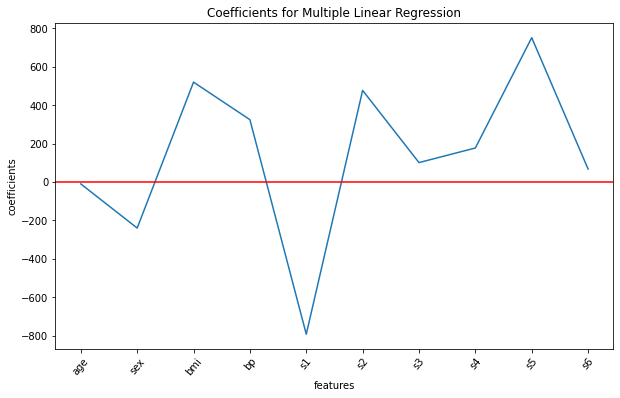

In [7]:
## Note that none of the estimated coefficient values are 0

# fetching feature names from the dataframe df
feature_names = df.drop('diabetes_measure',axis=1).columns

# Using matplotlib commands to plot
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [8]:
## The correlations among all the feature variables can be visualized 
## with the help of a correlation matrix :

X.corr().style.background_gradient(cmap='coolwarm')

## darker shades of red implying high positive correlation and 
## darker shades of blue implying high negative correlations.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [9]:
## Ridge Regression in scikit learn
## As alpha is a hyperparameter, its optimal value 
## (that maximizes average neg_mean_squared_error for the model) 
## can be found using the GridSearchCV

# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge

# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001,0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
gscv = GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',gscv.fit(X,y).best_params_)

# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the Ridge estimator is:',gscv.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.04}
The best score for the Ridge estimator is: -2997.186793719345


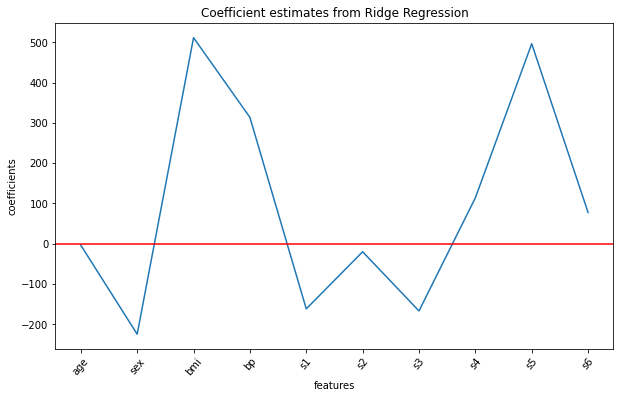

In [11]:
## visualize all the ten coefficient estimates for the ridge regression model

# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.04)

# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X,y).coef_

# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs[0])

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

**`Visual Ananlysis`** :  Previously, features s1 and s2 came out as an important feature in the multiple linear regression, however, their coefficient values are significantly reduced after ridge regularization. 

The features `bmi` and `s5` still remain important.

In [12]:
best_ridge_coeffs

array([[  -3.60964996, -224.32948213,  511.20371879,  313.55271527,
        -161.53387594,  -19.89297365, -166.67979782,  113.95024636,
         496.22227036,   77.44390618]])

In [13]:
## getting the optimal value of alpha in case of Lasso regression 
## using the GridSearchCV algorithm:

# importing the Lasso class from linear_model 
from sklearn.linear_model import Lasso

# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:', lasso.fit(X,y).best_params_)

# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Lasso estimator is:', lasso.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.06}
The best score for the best Lasso estimator is: -2987.4180821246437


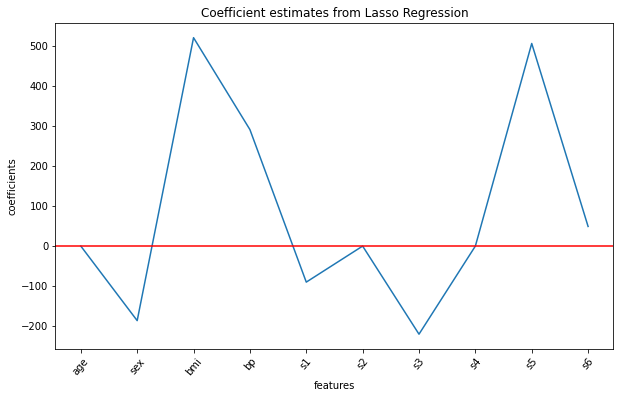

In [14]:
## visualize all the ten coefficient estimates for the Lasso regression model 

# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha=0.06)

# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X,y).coef_

# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)

plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [15]:
## print the lasso coefficients
best_lasso_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

In [16]:
from sklearn.linear_model import ElasticNet

alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.95,0.99,1]}

elastic = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10)

In [ ]:
## Let us now take a peek at the best values for hyperparameters alpha 
## and l1_ratio (and the best score from Elastic Net regularization):
import warnings
warnings.filterwarnings('ignore')

elastic.fit(X,y).best_params_

In [ ]:
# Printing the average neg_mean_squared_error of a 10-fold cross validation
import warnings
warnings.filterwarnings('ignore')

elastic.fit(X,y).best_score_

In [ ]:
# Creating an object containing the best Lasso regression model
best_elastic_model = ElasticNet(alpha=0.06, l1_ratio=1)

# Extracting the coefficient estimates for all ten features
best_elastic_coeffs = best_elastic_model.fit(X,y).coef_

best_elastic_coeffs

##-------------------------------------------------
## Note the coefficients are same as we got in lasso

In [ ]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs,
 'Elastic': best_elastic_coeffs},
 index=feature_names)

# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color

comparing_models= comparing_models.style.applymap(color_red_for_zero)

comparing_models

In [ ]:
## plotting is optional 
## we may plot for visual analysis of the parameters

## creating a new dataframe without elastic net regularization
comparing_models_new = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs},
 index=feature_names)

comparing_models_new.plot(figsize=(10, 6))

plt.axhline(0, color='r', linestyle='solid')

plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

Conclusion :
--

> Although Ridge regularization shrinks the values of coefficient estimates considerably by pulling them closer to zero, it does not make them exactly zero.

> On the other hand, Lasso regularization completely eliminates features ('age', 's2' and 's4' in our example) from the model by assigning their coefficients zero values. This results in a much more parsimonious/more simple model.

> As a default rule Lasso is the best when we have very large number of features and/or some features with very high coefficient values.

> As a default rule Ridge is the best when we have moderate number of features and some features with higher coefficient values.